In [73]:
import os
import cv2
import numpy as np

data_dir = './dauncabee'
categories = ["daunsehat", "daunkuning", "daunkeriting"]


x_data = []
y_labels = []

for label, category in enumerate(categories):
    folder_path = os.path.join(data_dir, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        img = img / 255.0
        x_data.append(img)
        y_labels.append(label)

x_data = np.array(x_data)
y_labels = np.array(y_labels)
print(f"Data shape: {x_data.shape}, Labels shape: {y_labels.shape}")


Data shape: (1200, 128, 128, 3), Labels shape: (1200,)


In [74]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(x_data, y_labels, test_size=0.2, random_state=42 )

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(name='feature'),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

c:\Users\septa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ feature (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,707 (28.20 MB)

 Trainable params: 7,392,707 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 340ms/step - accuracy: 0.4963 - loss: 1.4873 - val_accuracy: 0.8875 - val_loss: 0.2689
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.9234 - loss: 0.2134 - val_accuracy: 0.9542 - val_loss: 0.1140
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 282ms/step - accuracy: 0.9564 - loss: 0.1257 - val_accuracy: 0.9875 - val_loss: 0.0334
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 281ms/step - accuracy: 0.9886 - loss: 0.0440 - val_accuracy: 0.9917 - val_loss: 0.0316
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step - accuracy: 0.9819 - loss: 0.0652 - val_accuracy: 0.9917 - val_loss: 0.0178
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 393ms/step - accuracy: 0.9986 - loss: 0.0120 - val_accuracy: 0.9958 - val_loss: 0.0217
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.9982 - loss: 0.0095 - val_accuracy: 0.9833 - val_loss: 0.0423
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 312ms/step - accuracy: 0.9914 - loss: 0.0243 - val_accuracy

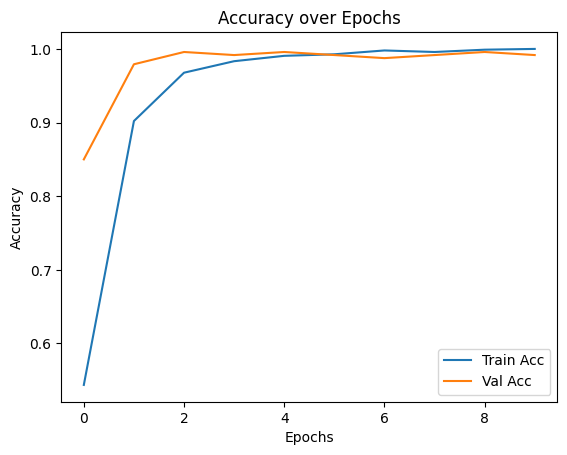

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [62]:
model.save("./models/cnn_model.h5")

In [67]:
from tensorflow.keras.models import load_model

model = load_model('./models/cnn_model.h5')

In [81]:
_=model.predict(x_train[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


In [ ]:
from tensorflow.keras.models import Model

feature_extractor = Model(
    inputs=model.input,
    outputs=model.get_layer('feature').output
)

x_train_features = feature_extractor.predict(x_train)
x_test_features = feature_extractor.predict(x_test)

AttributeError: The layer sequential_20 has never been called and thus has no defined input.

: 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_clf = SVC(kernel='linear', probability=True)
svm_clf.fit(x_train_features, y_train)

y_pred = svm_clf.predict(x_test_features)

print("Akurasi SVM:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=class_names))
